# Reviews Classification Using Keras RNN on IMDb DataSet

## Introduction
The IMDb Movie Reviews non-commercial dataset is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as positive or negative. The dataset contains an even number of positive and negative reviews. Only highly polarizing reviews are considered. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. No more than 30 reviews are included per movie. The dataset contains additional unlabeled data.

### Imports

In [179]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.layers import Bidirectional, Dense, Dropout, Embedding, GRU, LSTM, SimpleRNN
from keras.metrics import F1Score
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import pad_sequences  # adjust length of a set
from sklearn.metrics import classification_report

### Global Parameters

In [138]:
max_features = 10000  # the number of words considered as features
maxlen = 500  # limiting the number of words in the text

### Data Loading

In [115]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [116]:
print(input_train.shape)
print(input_test.shape)

print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [117]:
len(input_train[3])

550

### Preprocessing of sequential data
Applying a pre-selected maximum length to consecutive training and test set data.

In [118]:
input_train = pad_sequences(input_train, maxlen=maxlen)  # add zeros if the length < 500
input_test = pad_sequences(input_test, maxlen=maxlen)  # & cut the length if it's > 500

In [119]:
len(input_train[3]) # before was 550

500

Shape after applying max length

In [120]:
print(input_train.shape)
print(input_test.shape)

print(y_train.shape)
print(y_test.shape)

(25000, 500)
(25000, 500)
(25000,)
(25000,)


## Study

### Model Constructor

In [159]:
def model_constructor(
    core=SimpleRNN, units=32, optimizer=RMSprop, learn_rate=0.0001, name="RNN_S", drop=0
):
    model = Sequential(name=name)

    # Adding an Embedding layer to convert words into vectors of fixed length
    # output_dim - the size of the vector representing each word
    model.add(Embedding(input_dim=max_features, output_dim=units))
    model.add(Dropout(drop))

    # Adding a SimpleRNN layer with 32 nodes
    model.add(core(units))

    # Dense Layers for classification
    model.add(Dropout(drop))
    model.add(Dense(units, activation="relu"))
    model.add(Dropout(drop))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=optimizer(learning_rate=learn_rate),
        loss="binary_crossentropy",
        metrics=["acc"],
    )
    return model

### Printer of learning curves

In [160]:
def printer(history):
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, "bo", label="Training")
    plt.plot(epochs, val_acc, "r", label="Validation")
    plt.title("Accuracy")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, "bo", label="Training")
    plt.plot(epochs, val_loss, "r", label="Validation")
    plt.title("Loss")
    plt.legend()

    plt.show()

### Metrics

In [161]:
def metrics(model):
    class_names = ["Positive", "Negative"]
    y_predict = model.predict(input_test).round()
    print(classification_report(y_test, y_predict, target_names=class_names))

## Simple RNN Model

Epoch 1/10
196/196 [==============================] - 14s 67ms/step - loss: 0.6913 - acc: 0.5262 - val_loss: 0.6836 - val_acc: 0.5654
Epoch 2/10
196/196 [==============================] - 13s 68ms/step - loss: 0.6443 - acc: 0.6588 - val_loss: 0.6211 - val_acc: 0.6873
Epoch 3/10
196/196 [==============================] - 13s 68ms/step - loss: 0.5490 - acc: 0.7594 - val_loss: 0.5044 - val_acc: 0.7898
Epoch 4/10
196/196 [==============================] - 13s 69ms/step - loss: 0.4601 - acc: 0.8106 - val_loss: 0.4542 - val_acc: 0.8119
Epoch 5/10
196/196 [==============================] - 13s 69ms/step - loss: 0.3903 - acc: 0.8458 - val_loss: 0.3813 - val_acc: 0.8424
Epoch 6/10
196/196 [==============================] - 14s 69ms/step - loss: 0.3258 - acc: 0.8767 - val_loss: 0.3586 - val_acc: 0.8518
Epoch 7/10
196/196 [==============================] - 13s 69ms/step - loss: 0.2856 - acc: 0.8935 - val_loss: 0.3293 - val_acc: 0.8668
Epoch 8/10
196/196 [==============================] - 14s 69ms

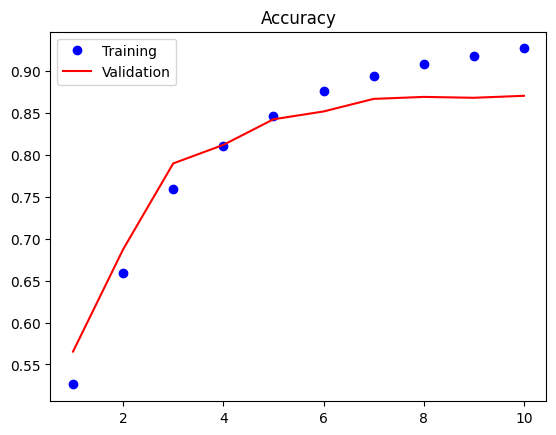

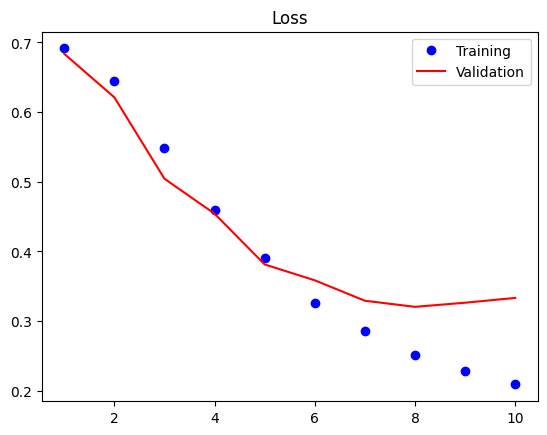

In [163]:
model_rnns = model_constructor()
history_rnns = model_rnns.fit(x=input_train, y=y_train, epochs=10, batch_size=128, validation_data=[input_test, y_test])
metrics(model_rnns)
printer(history_rnns)

### Conclution:
In 10 epochs the Simple RNN model is prone to overfitting, introducing dropout can help solve the problem but the result is unlikely to be much better than the achieved 87%.

### GRU Model

Epoch 1/10
196/196 [==============================] - 40s 193ms/step - loss: 0.6926 - acc: 0.5315 - val_loss: 0.6918 - val_acc: 0.5387
Epoch 2/10
196/196 [==============================] - 39s 197ms/step - loss: 0.6903 - acc: 0.5536 - val_loss: 0.6886 - val_acc: 0.5706
Epoch 3/10
196/196 [==============================] - 39s 197ms/step - loss: 0.6853 - acc: 0.5898 - val_loss: 0.6821 - val_acc: 0.5986
Epoch 4/10
196/196 [==============================] - 38s 194ms/step - loss: 0.6749 - acc: 0.6250 - val_loss: 0.6688 - val_acc: 0.6310
Epoch 5/10
196/196 [==============================] - 38s 193ms/step - loss: 0.6542 - acc: 0.6598 - val_loss: 0.6431 - val_acc: 0.6568
Epoch 6/10
196/196 [==============================] - 38s 196ms/step - loss: 0.6144 - acc: 0.6949 - val_loss: 0.5915 - val_acc: 0.7022
Epoch 7/10
196/196 [==============================] - 38s 195ms/step - loss: 0.5175 - acc: 0.7581 - val_loss: 0.4494 - val_acc: 0.7854
Epoch 8/10
196/196 [==============================] - 3

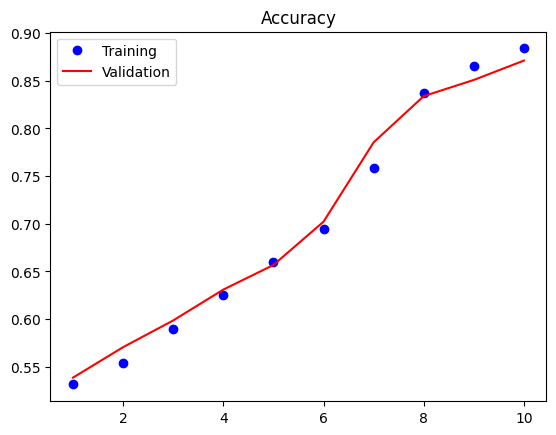

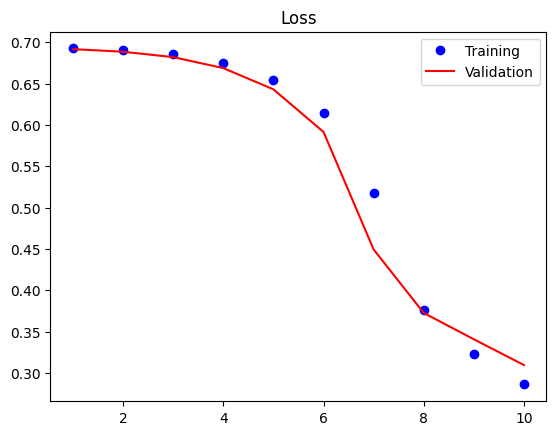

In [168]:
model_gru = model_constructor(core=GRU, name="GRU")
history_gru = model_gru.fit(x=input_train, y=y_train, epochs=10, batch_size=128, validation_data=[input_test, y_test])
metrics(model_gru)
printer(history_gru)

### Conclution:
Over 10 epochs the GRU model shows only slightly better results than the Simple RNN, however the Simple RNN after 10 epochs is subject to overfitting, while GRU continues to learn and can show better results if the number of epochs is greater.

## LSTM Model

Epoch 1/10
196/196 [==============================] - 44s 219ms/step - loss: 0.6926 - acc: 0.5468 - val_loss: 0.6921 - val_acc: 0.5730
Epoch 2/10
196/196 [==============================] - 43s 218ms/step - loss: 0.6906 - acc: 0.5975 - val_loss: 0.6888 - val_acc: 0.6179
Epoch 3/10
196/196 [==============================] - 43s 218ms/step - loss: 0.6827 - acc: 0.6487 - val_loss: 0.6705 - val_acc: 0.6787
Epoch 4/10
196/196 [==============================] - 43s 218ms/step - loss: 0.6057 - acc: 0.7302 - val_loss: 0.5534 - val_acc: 0.7654
Epoch 5/10
196/196 [==============================] - 43s 218ms/step - loss: 0.5100 - acc: 0.7953 - val_loss: 0.5082 - val_acc: 0.7594
Epoch 6/10
196/196 [==============================] - 43s 218ms/step - loss: 0.4278 - acc: 0.8346 - val_loss: 0.4387 - val_acc: 0.8071
Epoch 7/10
196/196 [==============================] - 43s 219ms/step - loss: 0.3608 - acc: 0.8606 - val_loss: 0.3540 - val_acc: 0.8557
Epoch 8/10
196/196 [==============================] - 4

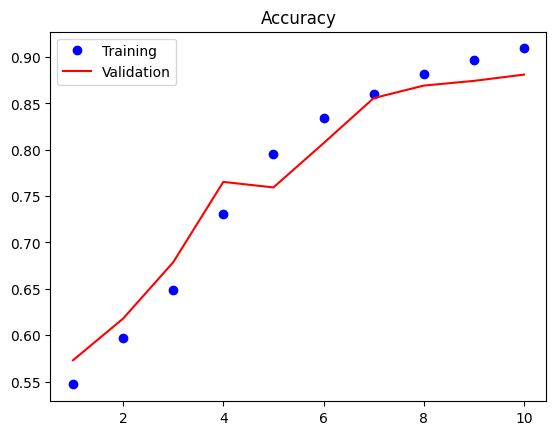

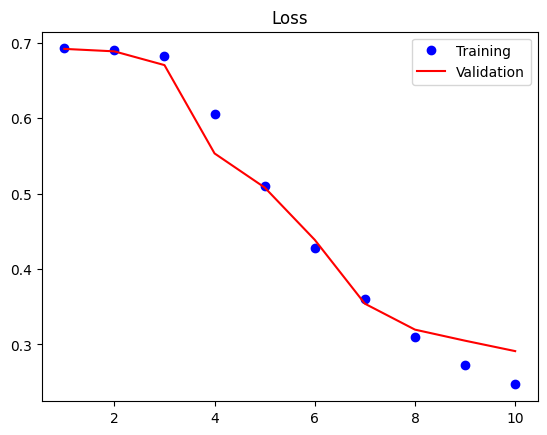

In [169]:
model_lstm = model_constructor(core=LSTM, name="LSTM")
history_lstm = model_lstm.fit(x=input_train, y=y_train, epochs=10, batch_size=128, validation_data=[input_test, y_test])
metrics(model_lstm)
printer(history_lstm)

### Conclusion:
The accuracy of the LSTM model in 10 epochs is 1% better than the previous two models, however it is much slower than others (especially Simple RNN).

### Biderectional LSTM Model

### Model Constructor

In [172]:
def bidirectional_constructor(
    core=LSTM, units=32, optimizer=RMSprop, learn_rate=0.0001, name="Bi_LSTM", drop=0
):
    model = Sequential(name=name)

    model.add(Embedding(input_dim=max_features, output_dim=units))
    model.add(Dropout(drop))

    # Adding a Bidirectional LSTM layer with 32 nodes
    model.add(Bidirectional(core(units)))

    model.add(Dropout(drop))
    model.add(Dense(units, activation="relu"))
    model.add(Dropout(drop))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=optimizer(learning_rate=learn_rate),
        loss="binary_crossentropy",
        metrics=["acc"],
    )
    return model

Epoch 1/10
196/196 [==============================] - 68s 338ms/step - loss: 0.6930 - acc: 0.5167 - val_loss: 0.6927 - val_acc: 0.5415
Epoch 2/10
196/196 [==============================] - 66s 336ms/step - loss: 0.6922 - acc: 0.5484 - val_loss: 0.6916 - val_acc: 0.5732
Epoch 3/10
196/196 [==============================] - 65s 333ms/step - loss: 0.6899 - acc: 0.5952 - val_loss: 0.6867 - val_acc: 0.6112
Epoch 4/10
196/196 [==============================] - 177s 905ms/step - loss: 0.6466 - acc: 0.6839 - val_loss: 0.6061 - val_acc: 0.6751
Epoch 5/10
196/196 [==============================] - 65s 332ms/step - loss: 0.5310 - acc: 0.7674 - val_loss: 0.4809 - val_acc: 0.8022
Epoch 6/10
196/196 [==============================] - 64s 329ms/step - loss: 0.4308 - acc: 0.8249 - val_loss: 0.4141 - val_acc: 0.8207
Epoch 7/10
196/196 [==============================] - 3778s 19s/step - loss: 0.3593 - acc: 0.8558 - val_loss: 0.3852 - val_acc: 0.8318
Epoch 8/10
196/196 [==============================] - 

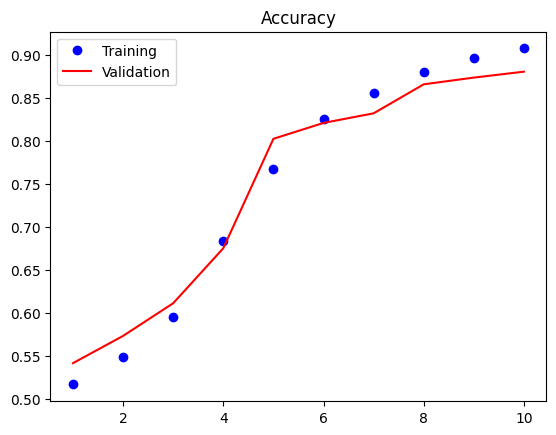

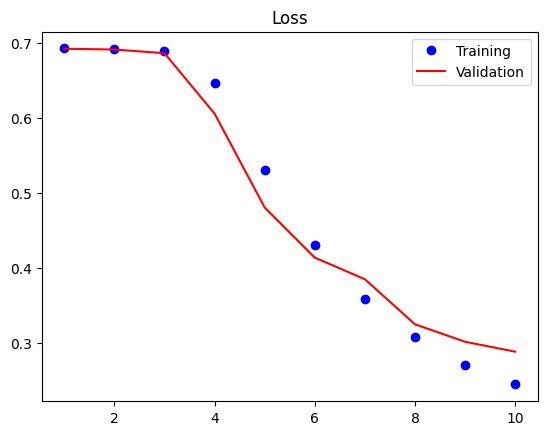

In [173]:
model_lstm_bi = bidirectional_constructor()
history_lstm_bi = model_lstm_bi.fit(x=input_train, y=y_train, epochs=10, batch_size=128, validation_data=[input_test, y_test])
metrics(model_lstm_bi)
printer(history_lstm_bi)

### Conclusion:
The bidirectional LSTM model shows very similar results to the ordinary LSTM model, but takes much longer. It appears that both past and future context is not useful for classifying reviews.

## Deep LSTM Model

### Model Constructor

In [175]:
def deep_bi_constructor(
    core=LSTM, units=32, optimizer=RMSprop, learn_rate=0.0001, name="Bi_LSTM", drop=0
):
    model = Sequential(name=name)

    model.add(Embedding(input_dim=max_features, output_dim=units))
    model.add(Dropout(drop))

    # Adding two Bidirectional LSTM layers with 32 nodes each
    model.add(Bidirectional(core(units, return_sequences=True)))
    model.add(Dropout(drop))
    model.add(Bidirectional(core(units)))

    model.add(Dropout(drop))
    model.add(Dense(units, activation="relu"))
    model.add(Dropout(drop))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=optimizer(learning_rate=learn_rate),
        loss="binary_crossentropy",
        metrics=["acc"],
    )
    return model

Epoch 1/10
196/196 [==============================] - 177s 884ms/step - loss: 0.6930 - acc: 0.5110 - val_loss: 0.6927 - val_acc: 0.5506
Epoch 2/10
196/196 [==============================] - 166s 849ms/step - loss: 0.6923 - acc: 0.5364 - val_loss: 0.6916 - val_acc: 0.5878
Epoch 3/10
196/196 [==============================] - 168s 859ms/step - loss: 0.6860 - acc: 0.5904 - val_loss: 0.6659 - val_acc: 0.6562
Epoch 4/10
196/196 [==============================] - 165s 846ms/step - loss: 0.5995 - acc: 0.7313 - val_loss: 0.5394 - val_acc: 0.7713
Epoch 5/10
196/196 [==============================] - 165s 845ms/step - loss: 0.4709 - acc: 0.8015 - val_loss: 0.4256 - val_acc: 0.8197
Epoch 6/10
196/196 [==============================] - 177s 902ms/step - loss: 0.3761 - acc: 0.8447 - val_loss: 0.3873 - val_acc: 0.8270
Epoch 7/10
196/196 [==============================] - 180s 916ms/step - loss: 0.3225 - acc: 0.8698 - val_loss: 0.3575 - val_acc: 0.8460
Epoch 8/10
196/196 [============================

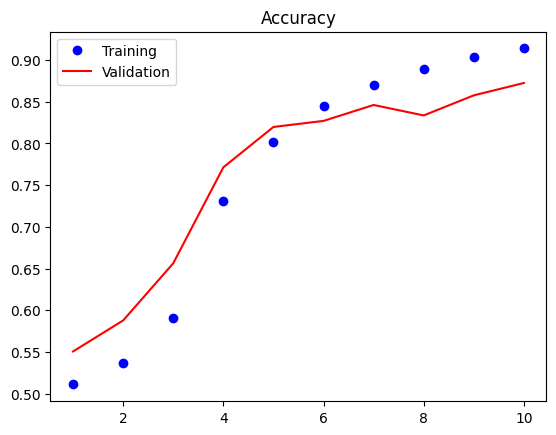

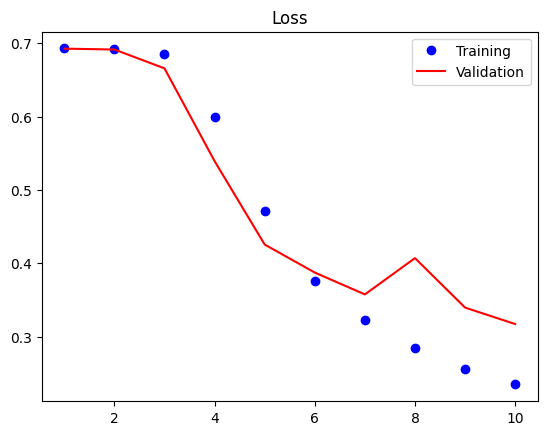

In [176]:
model_lstm_bi = deep_bi_constructor()
history_lstm_bi = model_lstm_bi.fit(x=input_train, y=y_train, epochs=10, batch_size=128, validation_data=[input_test, y_test])
metrics(model_lstm_bi)
printer(history_lstm_bi)

### Conclusion:
The Bidirectional Deep LSTM model shows results close to the ordinary LSTM, but it is too complicated for the sake of review classification, it is very slow and prone to overfitting after 7 epochs. The last problem can be solved with dropouts, but it is still 4 times slower than normal LSTM.

## Ordinary LSTM Optimization

Epoch 1/10
196/196 [==============================] - 44s 219ms/step - loss: 0.6919 - acc: 0.5196 - val_loss: 0.6888 - val_acc: 0.5650
Epoch 2/10
196/196 [==============================] - 45s 230ms/step - loss: 0.6232 - acc: 0.6846 - val_loss: 0.5325 - val_acc: 0.8095
Epoch 3/10
196/196 [==============================] - 44s 227ms/step - loss: 0.4770 - acc: 0.8473 - val_loss: 0.4385 - val_acc: 0.8484
Epoch 4/10
196/196 [==============================] - 43s 219ms/step - loss: 0.3733 - acc: 0.8725 - val_loss: 0.3536 - val_acc: 0.8628
Epoch 5/10
196/196 [==============================] - 43s 221ms/step - loss: 0.3032 - acc: 0.8887 - val_loss: 0.3143 - val_acc: 0.8758
Epoch 6/10
196/196 [==============================] - 43s 219ms/step - loss: 0.2596 - acc: 0.9043 - val_loss: 0.2972 - val_acc: 0.8798
Epoch 7/10
196/196 [==============================] - 43s 219ms/step - loss: 0.2301 - acc: 0.9177 - val_loss: 0.2841 - val_acc: 0.8842
Epoch 8/10
196/196 [==============================] - 4

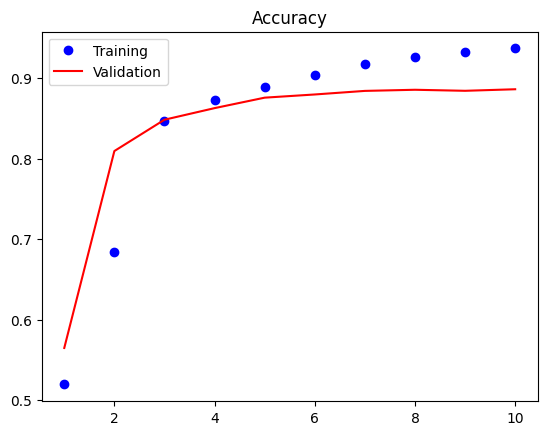

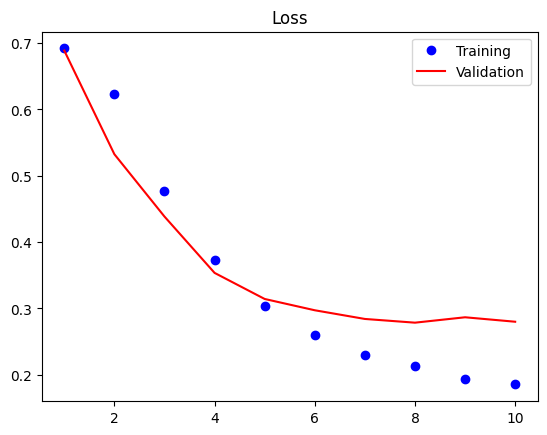

In [194]:
model_lstm_new = model_constructor(core=LSTM, optimizer=Adam, name="LSTM_new")
history_lstm_new = model_lstm_new.fit(x=input_train, y=y_train, epochs=10, batch_size=128, validation_data=[input_test, y_test])
metrics(model_lstm_new)
printer(history_lstm_new)

### Conclusion:
Ordinary LSTM model with dropuots and Adam optimizer seems to be the best model for clacification of MNIST reviews, in 10 epochs it shows 89% accuracy and F1 score.